In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("raw_reviews.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


From above we can say that:-
1.We can potentially refine sentiment analysis with the reviews.text column, with the actual rating of reviews.doRecommend column (boolean)
2.We can also label each review based on each sentiment
3.title can contain positive/negative information about review

In [3]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Based on the descriptive statistics above, we see the following:

Average review score of 4.58, with low standard deviation
Most review are positive from 2nd quartile onwards
The average for number of reviews helpful (reviews.numHelpful) is 0.6 but high standard deviation
The data are pretty spread out around the mean, and since can't have negative people finding something helpful, then this is only on the right tail side
The range of most reviews will be between 0-13 people finding helpful (reviews.numHelpful)
The most helpful review was helpful to 814 people
This could be a detailed, rich review that will be worth looking at

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Based on the information above:

Drop reviews.userCity, reviews.userProvince, reviews.id, and reviews.didPurchase since these values are floats (for exploratory analysis only)
Not every category have maximum number of values in comparison to total number of values
reviews.text category has minimum missing data (34659/34660) -> Good news!
We need to clean up the name column by referencing asins (unique products) since we have 7000 missing values

In [5]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [6]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


###### Visualizing the distributions of numerical variables:

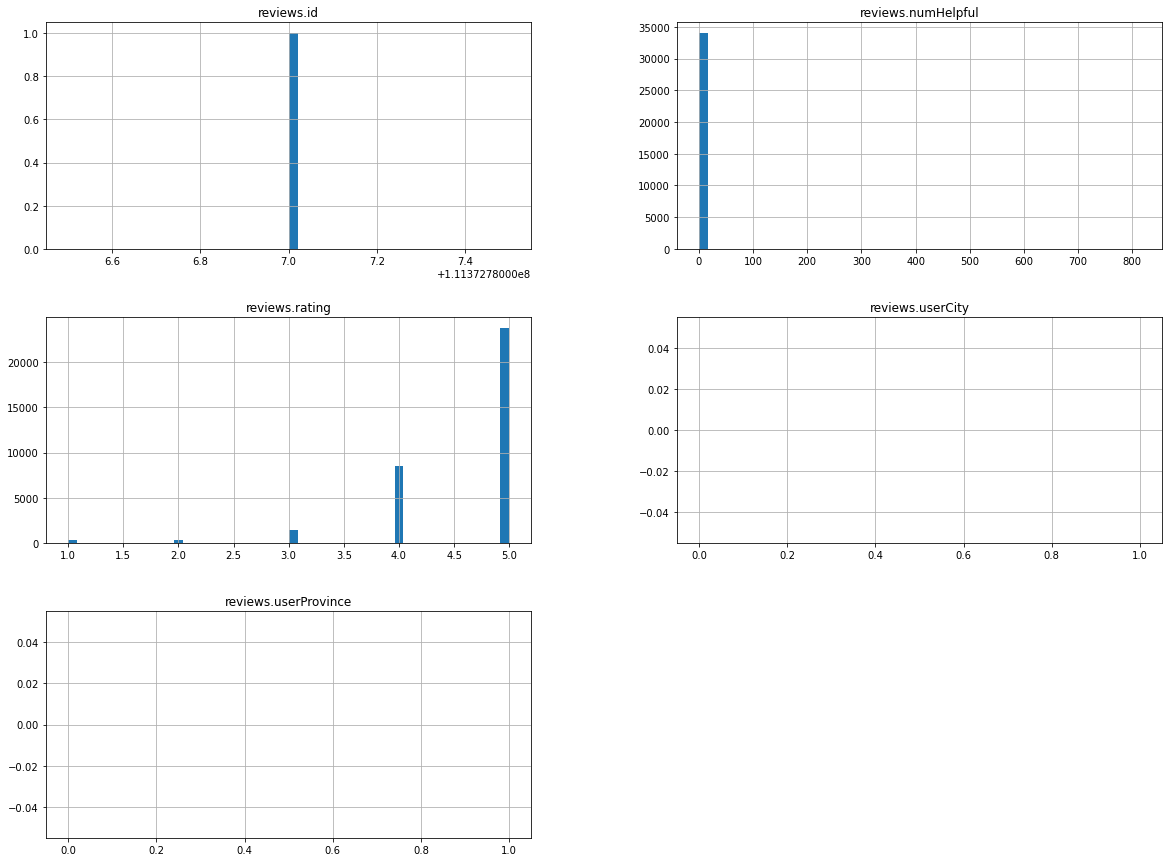

In [7]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

Based on the distributions above:

reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful
reviews.rating: Majority of examples were rated highly (looking at rating distribution). There is twice amount of 5 star ratings than the others ratings combined
##### Split into Train/Test
Before we explore the dataset we're going to split it into training set and test sets
Our goal is to eventually train a sentiment analysis classifier
Since the majority of reviews are positive (5 stars), we will need to do a stratified split on the reviews score to ensure that we don't train the classifier on imbalanced data
To use sklearn's Stratified ShuffleSplit class, we're going to remove all samples that have NAN in review score, then covert all review scores to integer datatype

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [9]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

###### Check to see if train/test sets were stratified proportionately in comparison to raw data.

In [10]:
len(strat_train)

27701

In [11]:
strat_train["reviews.rating"].value_counts()/len(strat_train)

5.0    0.685463
4.0    0.247392
3.0    0.043031
2.0    0.011732
1.0    0.011335
Name: reviews.rating, dtype: float64

In [12]:
len(strat_test)

6926

In [13]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.688709
4.0    0.243286
3.0    0.044037
1.0    0.012417
2.0    0.010973
Name: reviews.rating, dtype: float64

###### Data Exploration

In [14]:
reviews = strat_train.copy()
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
22710,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-14T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,I'd recommend this to everyone. Even if you ha...,Perfect,NaN,NaN,D4REST
14823,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-09-17T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,Great upgrade/replacement. No problems with it...,Perfect,NaN,NaN,Johnny01
30689,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-12-30T00:00:00.000Z,2017-09-20T05:35:56Z,"2017-08-25T22:21:49.178Z,2017-08-19T09:26:51.2...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,i love amazon fire tv is the best streaming in...,Best exelent,NaN,NaN,Carlos
26847,AVpfl8cLLJeJML43AE3S,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-01-17T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,This is a well built great sounding unit that ...,Great Sound,NaN,NaN,Adkinsj7
5185,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-01-08T00:00:00.000Z,2017-05-21T01:59:23Z,"2017-04-30T00:14:00.000Z,2017-06-07T08:13:00.000Z",...,True,NaN,0.0,3.0,http://reviews.bestbuy.com/3545/5025800/review...,Good beginner tablet for older person who like...,Ok product,NaN,NaN,dmac73


Next, we will explore the following columns:

asins
name
reviews.rating
reviews.doRecommend
(reviews.numHelpful - not possible since numHelpful is only between 0-13 as per previous analysis in Raw Data)
(reviews.text - not possible since text is in long words)
Also, we will explore columns to asins

In [15]:
len(reviews["name"].unique()), len(reviews["asins"].unique())

(49, 36)

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 22710 to 25241
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27672 non-null  object 
 1   name                  22222 non-null  object 
 2   asins                 27670 non-null  object 
 3   brand                 27672 non-null  object 
 4   categories            27672 non-null  object 
 5   keys                  27672 non-null  object 
 6   manufacturer          27672 non-null  object 
 7   reviews.date          27653 non-null  object 
 8   reviews.dateAdded     19287 non-null  object 
 9   reviews.dateSeen      27672 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27266 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27312 non-null  float64
 14  reviews.rating        27672 non-null  float64
 15  reviews.sourceU

Working hypothesis: there are only 35 products based on the training data ASINs

One for each ASIN, but more product names (47)
ASINs are what's important here since we're concerned with products. There's a one to many relationship between ASINs and names
A single ASIN can have many names due to different vendor listings
There could also a lot of missing names/more unique names with slight variations in title (ie. 8gb vs 8 gb, NAN for product names)

In [17]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00DU15MU4               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00IOY8XWQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE         

In [18]:
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
nan
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Echo (Black),,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Kindle Fire 5ft USB to Micro-USB

Note: there are actually 34 ASINs with one of the product having 2 ASINs

In [19]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2314
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              1994
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           254
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                            95
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

Confirmed our hypothesis that each ASIN can have multiple names. Therefore we should only really concern ourselves with which ASINs do well, not the product names.

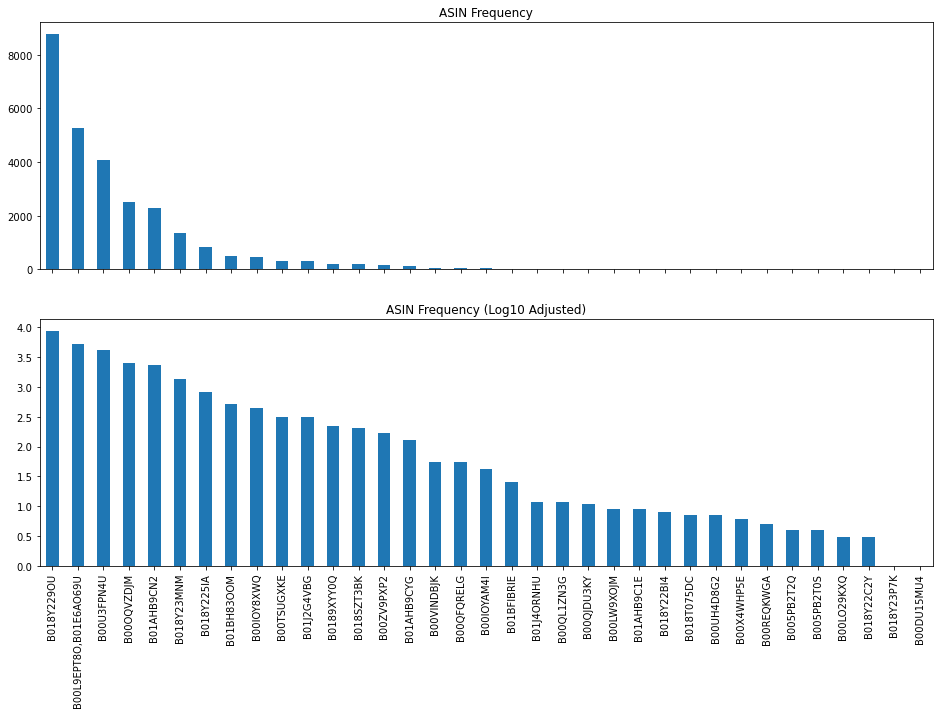

In [20]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

Based on the bar graph for ASINs, we see that certain products have significantly more reviews than other products, which may indicate a higher sale in those specific products
We also see that the ASINs have a "right tailed" distribution which can also suggest that certain products have higher sales which can correlate to the higher ASINs frequencies in the reviews
We also took the log of the ASINs to normalize the data, in order display an in-depth picture of each ASINs, and we see that the distribution still follows a "right tailed" distribution

In [21]:
reviews["reviews.rating"].mean()

4.585573865278983

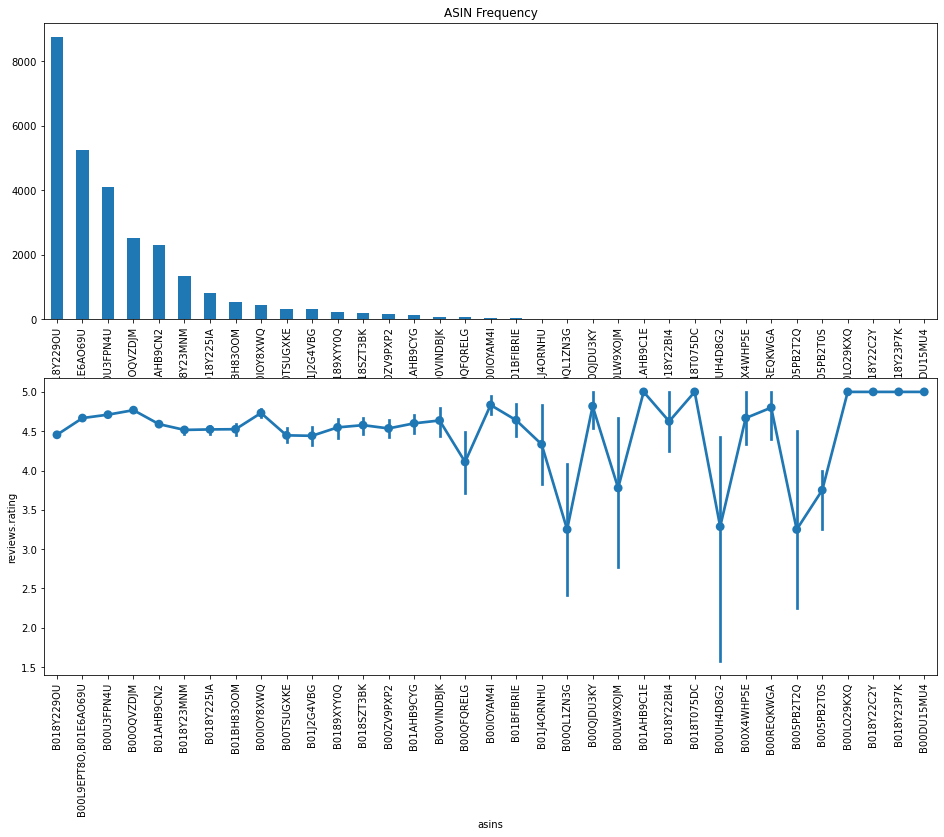

In [22]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

1a) The most frequently reviewed products have their average review ratings in the 4.5 - 4.8 range, with little variance
1b) Although there is a slight inverse relationship between the ASINs frequency level and average review ratings for the first 4 ASINs, this relationship is not significant since the average review for the first 4 ASINs are rated between 4.5 - 4.8, which is considered good overall reviews
2a) For ASINs with lower frequencies as shown on the bar graph (top), we see that their corresponding average review ratings on the point-plot graph (bottom) has significantly higher variance as shown by the length of the vertical lines. As a result, we suggest that, the average review ratings for ASINs with lower frequencies are not significant for our analysis due to high variance
2b) On the other hand, due to their lower frequencies for ASINs with lower frequencies, we suggest that this is a result of lower quality products
2c) Furthermore, the last 4 ASINs have no variance due to their significantly lower frequencies, and although the review ratings are a perfect 5.0, but we should not consider the significance of these review ratings due to lower frequency as explained in 2a)

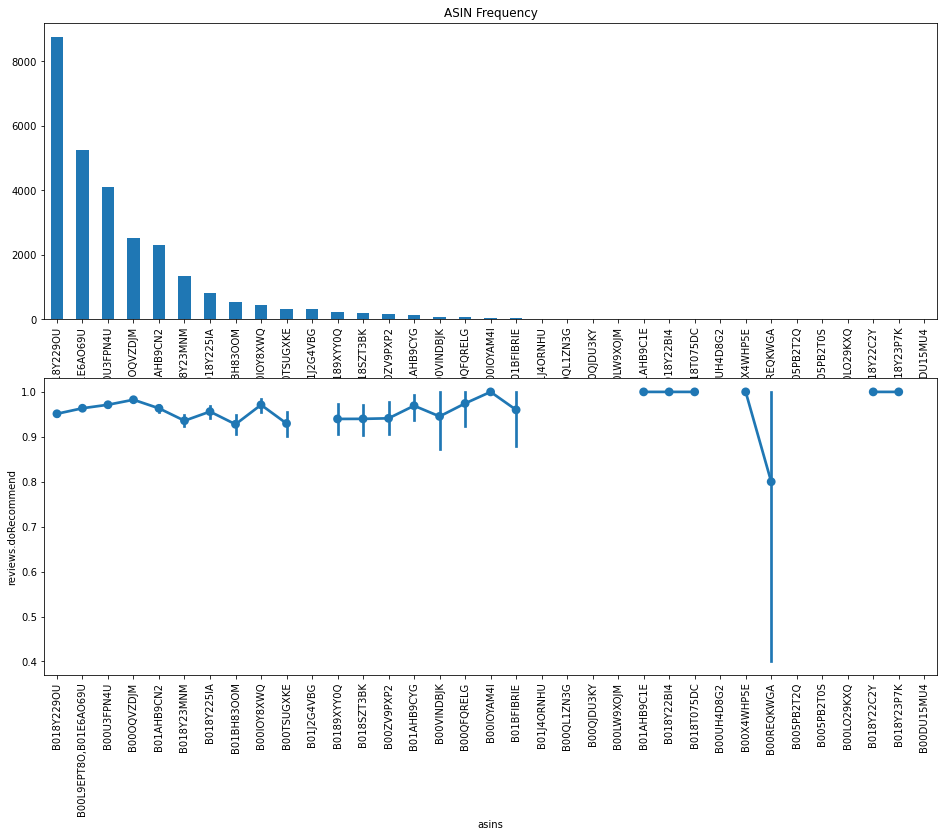

In [23]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

1a) The most frequently reviewed products have their average review ratings in the 4.5 - 4.8 range, with little variance
1b) Although there is a slight inverse relationship between the ASINs frequency level and average review ratings for the first 4 ASINs, this relationship is not significant since the average review for the first 4 ASINs are rated between 4.5 - 4.8, which is considered good overall reviews
2a) For ASINs with lower frequencies as shown on the bar graph (top), we see that their corresponding average review ratings on the point-plot graph (bottom) has significantly higher variance as shown by the length of the vertical lines. As a result, we suggest that, the average review ratings for ASINs with lower frequencies are not significant for our analysis due to high variance
2b) On the other hand, due to their lower frequencies for ASINs with lower frequencies, we suggest that this is a result of lower quality products
2c) Furthermore, the last 4 ASINs have no variance due to their significantly lower frequencies, and although the review ratings are a perfect 5.0, but we should not consider the significance of these review ratings due to lower frequency as explained in 2a)

In [24]:
corr_matrix = reviews.corr()
corr_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.040409,NaN,NaN
reviews.rating,NaN,-0.040409,1.000000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [25]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 22710 to 25241
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27672 non-null  object 
 1   name                  22222 non-null  object 
 2   asins                 27670 non-null  object 
 3   brand                 27672 non-null  object 
 4   categories            27672 non-null  object 
 5   keys                  27672 non-null  object 
 6   manufacturer          27672 non-null  object 
 7   reviews.date          27653 non-null  object 
 8   reviews.dateAdded     19287 non-null  object 
 9   reviews.dateSeen      27672 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27266 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27312 non-null  float64
 14  reviews.rating        27672 non-null  float64
 15  reviews.sourceU

In [26]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8766
"B00L9EPT8O,B01E6AO69U",5256
B00U3FPN4U,4088
B00OQVZDJM,2518
B01AHB9CN2,2296


In [27]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,3.750000
B005PB2T2Q,3.250000
B00DU15MU4,5.000000
B00IOY8XWQ,4.731707
B00IOYAM4I,4.833333


In [28]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8766,4.454255
"B00L9EPT8O,B01E6AO69U",5256,4.667047
B00U3FPN4U,4088,4.710372
B00OQVZDJM,2518,4.767673
B01AHB9CN2,2296,4.589721
B018Y23MNM,1340,4.516418
B018Y225IA,821,4.522533
B01BH83OOM,516,4.525194
B00IOY8XWQ,451,4.731707
B00TSUGXKE,313,4.447284


,asins,reviews.rating
asins,1.000000,0.080788
reviews.rating,0.080788,1.000000


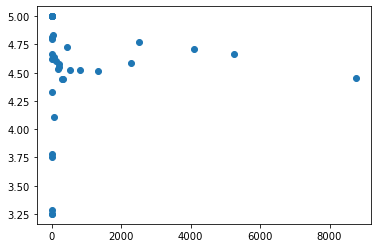

In [29]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

From our analysis in data exploration above between ASINs and reviews.rating, we discovered that there are many ASINs with low occurrence that have high variances, as a result we concluded that theses low occurrence ASINs are not significant in our analysis given the low sample size.

Similarly in our correlation analysis between ASINs and reviews.rating, we see that there is almost no correlation which is consistent with our findings.

###### Sentimental Analysis

In [30]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

22710    Positive
14823    Positive
30689    Positive
26847    Positive
5185      Neutral
5657      Neutral
8945     Positive
26700    Positive
5851     Positive
2783     Positive
25238    Positive
32856    Positive
11892    Positive
33155    Positive
30612    Positive
16393     Neutral
33646    Positive
14960    Positive
6835     Positive
16417    Positive
Name: Sentiment, dtype: object

In [32]:
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


27,701 training samples and 6926 testing samples.

In [33]:
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12460)

Here we will turn content into numerical feature vectors using the Bag of Words strategy:

Assign fixed integer id to each word occurrence (integer indices to word occurrence dictionary)
X[i,j] where i is the integer indices, j is the word occurrence, and X is an array of words (our training set)

In order to implement the Bag of Words strategy, we will use SciKit-Learn's CountVectorizer to performs the following:

Text preprocessing:
Tokenization (breaking sentences into words)
Stopwords (filtering "the", "are", etc)
Occurrence counting (builds a dictionary of features from integer indices with word occurrences)
Feature Vector (converts the dictionary of text documents into a feature vector)

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12460)

Here we have 27,701 training samples and 12,526 distinct words in our training sample.

Also, with longer documents, we typically see higher average count values on words that carry very little meaning, this will overshadow shorter documents that have lower average counts with same frequencies, as a result, we will use TfidfTransformer to reduce this redundancy:

Term Frequencies (Tf) divides number of occurrences for each word by total number of words
Term Frequencies times Inverse Document Frequency (Tfidf) downscales the weights of each word (assigns less value to unimportant stop words ie. "the", "are", etc)

###### Building a Pipeline from the Extracted Features
We will use Multinominal Naive Bayes as our Classifier

Multinominal Niave Bayes is most suitable for word counts where data are typically represented as word vector counts (number of times outcome number X[i,j] is observed over the n trials), while also ignoring non-occurrences of a feature i
Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed conditioned independent to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [36]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9318509962460294

Here we see that our Multinominal Naive Bayes Classifier has a 93.18% accuracy level based on the features.

Next we will conduct the following:

Test other models
Fine tune the best models to avoid over-fitting

###### Logistic Regression Classifier

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9360381172393878

###### Support Vector Machine Classifier

In [38]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9369044181345654

###### Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8941669073058042

###### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.932717297141207

Looks like all the models performed very well (>90%), and we will use the Support Vector Machine Classifier since it has the highest accuracy level at 93.69%.
Now we will fine tune the Support Vector Machine model (Linear_SVC) to avoid any potential over-fitting.

###### Fine tuning the Support Vector Machine Classifier
Here we will run a Grid Search of the best parameters on a grid of possible values, instead of tweaking the parameters of various components of the chain (ie. use_idf in tfidftransformer)
We will also run the grid search with LinearSVC classifier pipeline, parameters and cpu core maximization
Then we will fit the grid search to our training data set
Next we will use our final classifier (after fine-tuning) to test some arbitrary reviews
Finally we will test the accuracy of our final classifier (after fine-tuning)
Note that Support Vector Machines is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.",
            "The tablet is ok, but it works fine.",
            "The tablet is not good, does not work very well."]

X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(new_text)]

In [49]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9390701703725094

Results:

After testing some arbitrary reviews, it seems that our features is performing correctly with Positive, Neutral, Negative results
We also see that after running the grid search, our Support Vector Machine Classifier has improved to 93.90% accuracy level

###### Detailed Performance Analysis of Support Vector Machine Classifier
For detailed analysis, we will:

Analyze the best mean score of the grid search (classifier, parameters, CPU core)
Analyze the best estimator
Analyze the best parameter

In [52]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9376556122166431
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


Here we see that the best mean score of the grid search is 93.76% which is very close to our accuracy level of 94.08%
Our best estimator here is also displayed
Lastly, our best parameters are true for use_idf in tfidf, and ngram_range between 1,2

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         4
    Negative       0.75      0.25      0.37       162
     Neutral       0.53      0.08      0.14       305
    Positive       0.94      1.00      0.97      6455

    accuracy                           0.94      6926
   macro avg       0.56      0.33      0.37      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9390701703725094


Below is the summary of the classification report:

Precision: determines how many objects selected were correct
Recall: tells you how many of the objects that should have been selected were actually selected
F1 score measures the weights of recall and precision (1 means precision and recall are equally important, 0 otherwise)
Support is the number of occurrences of each class
The results in this analysis confirms our previous data exploration analysis, where the data are very skewed to the positive reviews as shown by the lower support counts in the classification report. Also, both neutral and negative reviews has large standard deviation with small frequencies, which we would not consider significant as shown by the lower precision, recall and F1 scores in the classification report.

However, despite that Neutral and Negative results are not very strong predictors in this data set, it still shows a 93.90% accuracy level in predicting the sentiment analysis, which we tested and worked very well when inputting arbitrary text (new_text). Therefore, we are comfortable here with the skewed data set. Also, as we continue to input new dataset in the future that is more balanced, this model will then re-adjust to a more balanced classifier which will increase the accuracy level.

Note: The first row will be ignored as we previously replaced all NAN with " ". We tried to remove this row when we first imported the raw data, but Pandas DataFrame did not like this row removed when we tried to drop all NAN (before stratifying and splitting the dataset). As a result, replacing the NAN with " " was the best workaround and the first row will be ignored in this analysis.

Finally, the overall result here explains that the products in this dataset are generally positively rated.

In [55]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    4],
       [   0,   40,    8,  114],
       [   0,   11,   24,  270],
       [   0,    2,   13, 6440]], dtype=int64)

Note: The first row and column will be ignored as we previously replaced all NAN with " ". This is the same situation explained above in the classification report.

By considering only row 2-4 and column 2-4 labeled as negative, neutral and positive, we see that positive sentiment can sometimes be confused for one another with neutral and negative ratings, with scores of 270 and 114 respectively. However, based on the overall number of significant positive sentiment at a score 6440, then confusion score of 270 and 114 for neutral and negative ratings respectively are considered insignificant.

Also, this is a result of positively skewed dataset, which is consistent with both our data exploration and sentiment analysis. Therefore, we conclude that the products in this dataset are generally positively rated, and should be kept from Amazon's product roster.